# Universidad Ricardo Palma 
## Unidad de Postgrado 
### Maestría en Ciencia de los datos 

**Tarea: Aplicaciones en GPS**

* Código: 202020627
* Alumno: Manosalva López Anthony

# Aplicaciones en GPS - Desarrollo de Programa en Python

## Importando librerías

In [12]:
from sympy import Symbol, Matrix, Number, \
                  expand, simplify, solve, init_printing

init_printing(use_latex=True)

## Funciones

In [4]:
def round_expr(expr, num_digits):
    return expr.xreplace({n : round(n, num_digits) for n in expr.atoms(Number)})

In [5]:
def solucion_gps(posiciones, tiempo):

    x = Symbol('x')
    y = Symbol('y')
    z = Symbol('z')
    t = Symbol('t')

    print("\n- Datos arrojados por los satelites:\n")
    
    print("\n* Posiciones \n")
    display(Matrix(posiciones))
    
    print("\n* Tiempo \n")
    display(Matrix(tiempo))

    eq1 = (x - posiciones[0][0])**2 + (y - posiciones[0][1])**2 + (z - posiciones[0][2])**2 - (4.7*(t - tiempo[0]))**2
    eq2 = (x - posiciones[1][0])**2 + (y - posiciones[1][1])**2 + (z - posiciones[1][2])**2 - (4.7*(t - tiempo[1]))**2
    eq3 = (x - posiciones[2][0])**2 + (y - posiciones[2][1])**2 + (z - posiciones[2][2])**2 - (4.7*(t - tiempo[2]))**2
    eq4 = (x - posiciones[3][0])**2 + (y - posiciones[3][1])**2 + (z - posiciones[3][2])**2 - (4.7*(t - tiempo[3]))**2

    eq1 = expand(eq1)
    eq2 = expand(eq2)
    eq3 = expand(eq3)
    eq4 = expand(eq4)

    print("\n- Ecuaciones\n")
    display(eq1)
    display(eq2)
    display(eq3)
    display(eq4)


    ec1 = simplify(eq1-eq2).expand()
    ec2 = simplify(eq3-eq1).expand()
    ec3 = simplify(eq1-eq4).expand()

    # Redondeo
    ec1 = round_expr(ec1, 13)
    ec2 = round_expr(ec2, 13)
    ec3 = round_expr(ec3, 13)

    print("\n- Restando la primera de cada una de las tres restantes, obtenemos:\n")
    display(ec1)
    display(ec2)
    display(ec3)

    sol = solve([ec1, ec2, ec3], [x,y,z])

    # Redondeando las soluciones
#     for s in sol.keys():
#         sol[s] = round_expr(sol.get(s), 10)

    print("\n- Resolviendo las ecuaciones con la variable t\n")
    #display(sol)

    Sx = sol[(x)]
    Sy = sol[(y)]
    Sz = sol[(z)]

    display(Matrix([Sx, Sy, Sz]))

    print("\n- Sustituyendo los valores en la primera ecuación obtenemos la siguiente ecuación igualada a 0:\n")
    eq_final = eq1.subs(x, Sx).subs(y, Sy).subs(z, Sz)
    eq_final = eq_final.expand()
    display(eq_final)

    valores_t = solve(eq_final, t)

    #Redondeo
    for vt in range(0, len(valores_t)):
        valores_t[vt] = round_expr(valores_t[vt], 5)

    print("\nDesarrollando la ecuación obtenemos los valores de t\n")
    display(Matrix(valores_t))

    
    print("\n- Ahora sustituimos ambos valores en las ecuaciones para x,y,z, obtenemos:\n")
    print("\n* Primera solución: (x,y,z) = \n")
    sol1 = [
        Sx.subs(t, valores_t[0]),
        Sy.subs(t, valores_t[0]),
        Sz.subs(t, valores_t[0]),
    ]
    display(Matrix(sol1))

    print("\n* Segunda solución: (x,y,z) = \n")
    sol2 = [
        Sx.subs(t, valores_t[1]),
        Sy.subs(t, valores_t[1]),
        Sz.subs(t, valores_t[1]),
    ]
    display(Matrix(sol2))

    print("\n- Para poder decidir que valores son los correctos, verificamos ahora que conjunto de valores pertenecen a un punto en la superficie terrestre, es decir, si están en la esfera con radio 1.\n")
    get_solution(x,y,z, sol1, sol2, valores_t)
    

def get_solution(x,y,z, sol1, sol2, valores_t):
    eq_esfera_1 = x**2 + y**2 + z**2 
    v1 = eq_esfera_1.subs(x, sol1[0]).subs(y, sol1[1]).subs(z, sol1[2])
    v2 = eq_esfera_1.subs(x, sol2[0]).subs(y, sol2[1]).subs(z, sol2[2])
    
    if abs(1 - v1) < abs(1 - v2):
        print("\nLa mejor solución es:\n\n(x,y,z)=")     
        sol1 = [round(x,5) for x in sol1]
        display(sol1)
        print("\nt = \n")
        display(round_expr(valores_t[0],0))
    else:
        print("\nLa mejor solución es:\n\n(x,y,z)=")
        sol2 = [round(x,5) for x in sol2]
        display(sol2)
        print("\n Para t =")
        display(round_expr(valores_t[1],0))

## Solución de Ejercicios

### Ejercicio 0

In [6]:
posiciones = [
                [2.6871   , 0.997843 , 0.808889],
                [1.28081  , 1.66812  , 1.05613 ],
                [0.754194 , 2.66006  , 0.695377],
                [0.534611 , 0.945304 , 0.693213]
             ]

tiempo = [
            5.44013,
            5.63532,
            5.49932,
            5.84649
         ]


- Datos arrojados por los satelites:


* Posiciones 



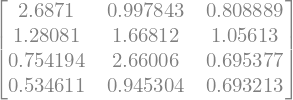


* Tiempo 



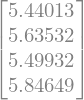


- Ecuaciones



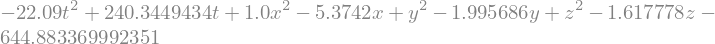

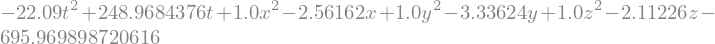

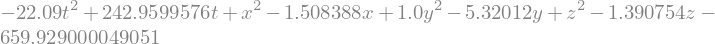

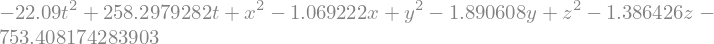


- Restando la primera de cada una de las tres restantes, obtenemos:




- Resolviendo las ecuaciones con la variable t



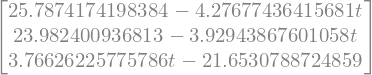


- Sustituyendo los valores en la primera ecuación obtenemos la siguiente ecuación igualada a 0:




Desarrollando la ecuación obtenemos los valores de t



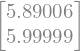


- Ahora sustituimos ambos valores en las ecuaciones para x,y,z, obtenemos:


* Primera solución: (x,y,z) = 



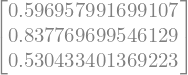


* Segunda solución: (x,y,z) = 



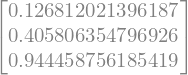


- Para poder decidir que valores son los correctos, verificamos ahora que conjunto de valores pertenecen a un punto en la superficie terrestre, es decir, si están en la esfera con radio 1.


La mejor solución es:

(x,y,z)=



 Para t =


In [7]:
solucion_gps(posiciones, tiempo)

### Ejercicio 1


- Datos arrojados por los satelites:


* Posiciones 



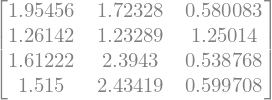


* Tiempo 



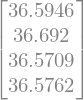


- Ecuaciones



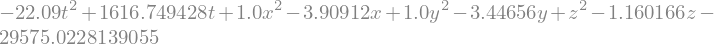

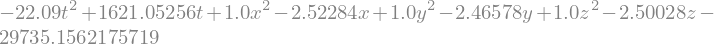

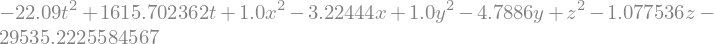

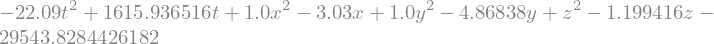


- Restando la primera de cada una de las tres restantes, obtenemos:




- Resolviendo las ecuaciones con la variable t



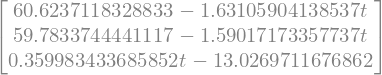


- Sustituyendo los valores en la primera ecuación obtenemos la siguiente ecuación igualada a 0:




Desarrollando la ecuación obtenemos los valores de t



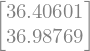


- Ahora sustituimos ambos valores en las ecuaciones para x,y,z, obtenemos:


* Primera solución: (x,y,z) = 



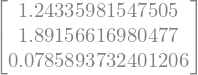


* Segunda solución: (x,y,z) = 



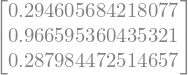


- Para poder decidir que valores son los correctos, verificamos ahora que conjunto de valores pertenecen a un punto en la superficie terrestre, es decir, si están en la esfera con radio 1.


La mejor solución es:

(x,y,z)=



 Para t =


In [8]:
posiciones_1 = [
                [1.95456  , 1.72328 , 0.580083],
                [1.26142  , 1.23289 , 1.25014 ],
                [1.61222  , 2.3943  , 0.538768],
                [1.515    , 2.43419 , 0.599708]
             ]

tiempo_1 = [
            36.5946,
            36.692 ,
            36.5709,
            36.5762
         ]

solucion_gps(posiciones_1, tiempo_1)

### Ejercicio 2


- Datos arrojados por los satelites:


* Posiciones 



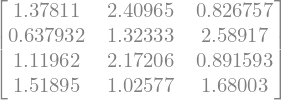


* Tiempo 



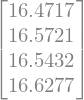


- Ecuaciones



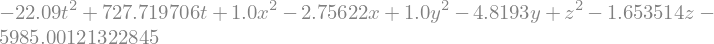

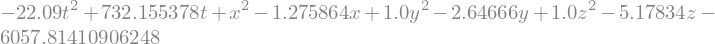

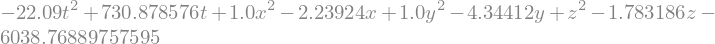

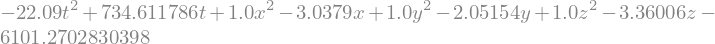


- Restando la primera de cada una de las tres restantes, obtenemos:




- Resolviendo las ecuaciones con la variable t



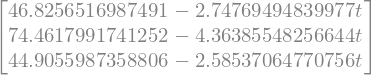


- Sustituyendo los valores en la primera ecuación obtenemos la siguiente ecuación igualada a 0:




Desarrollando la ecuación obtenemos los valores de t



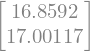


- Ahora sustituimos ambos valores en las ecuaciones para x,y,z, obtenemos:


* Primera solución: (x,y,z) = 



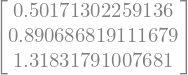


* Segunda solución: (x,y,z) = 



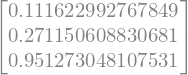


- Para poder decidir que valores son los correctos, verificamos ahora que conjunto de valores pertenecen a un punto en la superficie terrestre, es decir, si están en la esfera con radio 1.


La mejor solución es:

(x,y,z)=



 Para t =


In [9]:
posiciones_2 = [
                [1.37811, 2.40965, 0.826757],
                [0.637932, 1.32333, 2.58917],
                [1.11962, 2.17206, 0.891593],
                [1.51895, 1.02577, 1.68003]
             ]

tiempo_2 = [
            16.4717,
            16.5721,
            16.5432,
            16.6277
         ]

solucion_gps(posiciones_2, tiempo_2)

### Ejercicio 3


- Datos arrojados por los satelites:


* Posiciones 



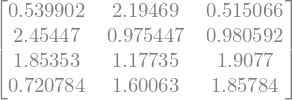


* Tiempo 



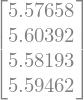


- Ecuaciones



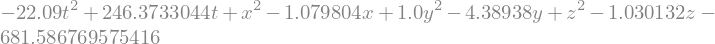

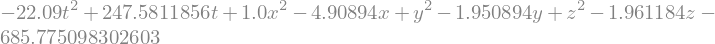

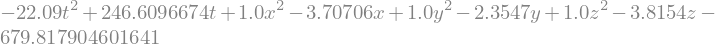

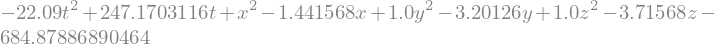


- Restando la primera de cada una de las tres restantes, obtenemos:




- Resolviendo las ecuaciones con la variable t



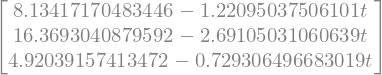


- Sustituyendo los valores en la primera ecuación obtenemos la siguiente ecuación igualada a 0:




Desarrollando la ecuación obtenemos los valores de t



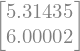


- Ahora sustituimos ambos valores en las ecuaciones para x,y,z, obtenemos:


* Primera solución: (x,y,z) = 



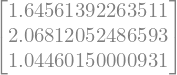


* Segunda solución: (x,y,z) = 



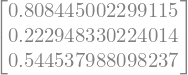


- Para poder decidir que valores son los correctos, verificamos ahora que conjunto de valores pertenecen a un punto en la superficie terrestre, es decir, si están en la esfera con radio 1.


La mejor solución es:

(x,y,z)=



 Para t =


In [10]:
posiciones_3 = [
                [0.539902 , 2.19469  , 0.515066],
                [2.45447  , 0.975447 , 0.980592],
                [1.85353  , 1.17735  , 1.9077  ],
                [0.720784 , 1.60063  , 1.85784 ]
             ]

tiempo_3 = [
            5.57658,
            5.60392,
            5.58193,
            5.59462
         ]

solucion_gps(posiciones_3, tiempo_3)

### Ejercicio 4


- Datos arrojados por los satelites:


* Posiciones 



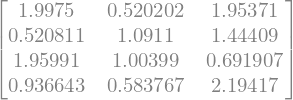


* Tiempo 



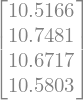


- Ecuaciones



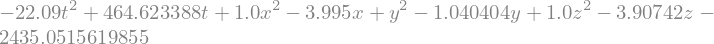

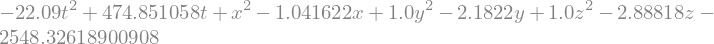

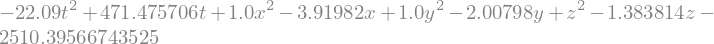

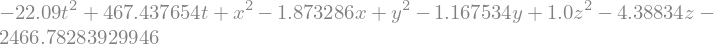


- Restando la primera de cada una de las tres restantes, obtenemos:




- Resolviendo las ecuaciones con la variable t



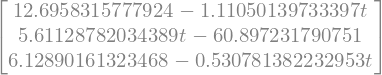


- Sustituyendo los valores en la primera ecuación obtenemos la siguiente ecuación igualada a 0:




Desarrollando la ecuación obtenemos los valores de t



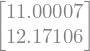


- Ahora sustituimos ambos valores en las ecuaciones para x,y,z, obtenemos:


* Primera solución: (x,y,z) = 



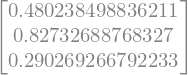


* Segunda solución: (x,y,z) = 



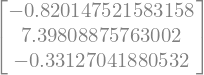


- Para poder decidir que valores son los correctos, verificamos ahora que conjunto de valores pertenecen a un punto en la superficie terrestre, es decir, si están en la esfera con radio 1.


La mejor solución es:

(x,y,z)=



t = 



In [11]:
posiciones_4 = [
                [1.9975   , 0.520202 , 1.95371],
                [0.520811 , 1.0911   , 1.44409],
                [1.95991  , 1.00399  , 0.691907],
                [0.936643 , 0.583767 , 2.19417]
             ]

tiempo_4 = [
            10.5166,
            10.7481,
            10.6717,
            10.5803
         ]

solucion_gps(posiciones_4, tiempo_4)

### Ejercicio 5

In [ ]:
posiciones_5 = [
                [0.858612, 1.82128, 0.917149],
                [1.46621, 1.29383, 0.934071],
                [1.26943, 2.20292, 0.965437],
                [1.91226, 1.68888, 1.3802]
             ]

tiempo_5 = [
            0.657103,
            0.705031,
            0.555515,
            0.561975
         ]

solucion_gps(posiciones_5, tiempo_5)